In [ ]:
""" Question: Wait circumference Vs Adipose tissue data"""

""" a) Excess adipose tissue in abdominal region have higher risk of cardic vasular disease
    b) CT scan (computed Tomography) isthe only technique that allows for presice measurement of adipose tissue
    c) But problem with CT scan are 
        - many doctors dont have CT scan
        -irradition
        -Expensive
    d) Is there any simple reasonable way to calculate Adipose Tissue
        - Easily available
        - risk free
        - Inexpensive
    e) Research found AT can be predictedby measurement of human body
    f) WC(waist circumference) by using which we can predict AT"""

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# read CSV file

df=pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/Assignment 1/wc-at.csv")
# print(df.shape)
# print(df.head())


# Lets try to visualize data using histogram or scatterplot (preferable)

# plt.hist(df.Waist)
# plt.show()

# plt.plot(df.Waist,df.AT,"o") # "0" gives dot on chart, "X" gives x marker
# plt.show()

# as data is small, we shall not split data into test and train

# Apply simple linear regression formula
#syntax: Model_name = smf.ols("yaxis~Xaxis",data=dataframe).fit()

slr_model=smf.ols("AT~Waist",data=df).fit()

#here, .ols=Ordinary least square built in fnction; "AT(Yaxis)~Waist(x axis)" ; .fit() is to start training process

# also, GDA will be initialized; GDA initialize weight parameter, perform multiple iteration and global minima/best weight parameter is obtained

print(slr_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.62e-27
Time:                        19:29:59   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.0

In [ ]:
"""from above output note values for:
R square= 0.67 i.e model is 67% accurate
Intercept = W0= -215.9815
Waist (value below intercept) = W1= 3.4589
Standard Error = 21.796"""

In [27]:
# use model for performing predictions

prediction=slr_model.predict(df.iloc[:,0])  # . predict is inbuilt function; iloc[:,0] means slicing all row (:) and 0th column

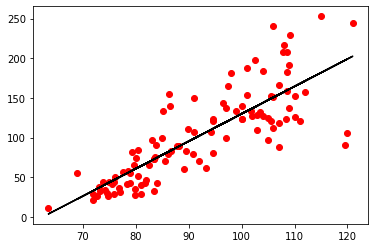

In [28]:
# display scatter plot

plt.scatter(x=df['Waist'],y=df['AT'],color='red')
plt.plot(df['Waist'],prediction,color='black')
plt.show()

In [34]:
# As our R square is 67% we can improve our model using 'log' function

slr_log_model=smf.ols('AT~np.log(Waist)', data=df).fit()

prediction_log= slr_log_model.predict(df['Waist'])

print(slr_log_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           6.80e-28
Time:                        19:40:39   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848

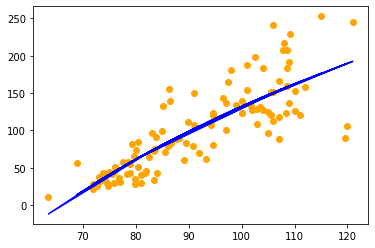

In [35]:
# here R Square is slightly better i.e. 67.5%

#visualize using scatter plot

plt.scatter(x=df['Waist'],y=df['AT'],color='orange')
plt.plot(df['Waist'],prediction_log,color='blue')
plt.show()